In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_csv("Data/Raw/santander_train_ver2_eng_names.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
data.province_name.unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', nan,
       'ALMERIA', 'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA',
       'HUELVA', 'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE',
       'MELILLA', 'TARRAGONA', 'ALAVA', 'CEUTA'], dtype=object)

Survival analysis only on province_name = 'Malaga'. This segmentation is only for creating a test run for survival analysis

In [27]:
data = data[data.province_name == "MALAGA"]

In [28]:
data.shape

(367023, 48)

Encode date to series value

In [29]:
encode_date = {'2015-01-28': 0,'2015-02-28': 1,'2015-03-28':2,'2015-04-28':3,'2015-05-28':4,'2015-06-28':5,'2015-07-28':6,'2015-08-28':7,'2015-09-28':8,
              '2015-10-28':9,'2015-11-28':10,'2015-12-28':11,'2016-01-28':12,'2016-02-28':13,'2016-03-28':14,'2016-04-28':15,'2016-05-28':16}
data.date = [encode_date[item] for item in data.date]

In [30]:
unique_cust_ID = data.customer_code.unique()
print(len(unique_cust_ID))

25211


Data manipulation to create matrix for each unique customer_code and products tenure in months. Each product column value represents tenure for customer

Assumptions - 

1) As the start date or the activation date of the account for a customer is not defined in the data, number of active months was considered to calculate tenure for a product in the given time period of 17 months.

2) Few customers deactivated product in middle and again activated. This case is ignored in our analysis.


### Below is the code for generating matrix user-account tenure. This matrix has been saved as Survival_Analysis_Matrix.xlsx file, so need not run below code

In [11]:
test = pd.DataFrame()
unique_cust_ID = data.customer_code.unique()
print(len(unique_cust_ID))
A = data.columns[24:48]
for i in range(0,len(unique_cust_ID)):
    test.loc[i,0] = unique_cust_ID[i]
    print(i)
    for j in range(1,25):
        test.loc[i,j] = data[A[j-1]][data['customer_code'] == unique_cust_ID[i]].sum()

test

305385
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275

KeyboardInterrupt: 

In [12]:
test.to_csv('Data/Processed/Survival_Analysis_Matrix.csv')

## Import the data Survival_Analysis_Matrix

In [3]:
test = pd.read_excel('Data/Processed/Survival_Analysis_Matrix.xlsx')
test = test.drop(['Unnamed: 0','Row'],axis = 1)
test = test.astype('int64')

In [8]:
test.columns = ['customer_code','ind_savings_account', 'ind_guarantees', 'ind_current_account',
       'ind_derivada_account', 'ind_payroll_account', 'ind_junior_account',
       'ind_mas_particular_account', 'ind_particular_account',
       'ind_particular_plus_account', 'ind_short_term_deposit',
       'ind_medium_term_deposit', 'ind_long_term_deposit', 'ind_eaccount',
       'ind_funds', 'ind_mortgage', 'ind_pensions', 'ind_loans',
       'ind_taxes', 'ind_credit_cards', 'ind_securities',
       'ind_home_accounts', 'ind_payrolls', 'ind_pensions_2',
       'ind_direct_debits']
test.head()

,customer_code,ind_savings_account,ind_guarantees,ind_current_account,ind_derivada_account,ind_payroll_account,ind_junior_account,ind_mas_particular_account,ind_particular_account,ind_particular_plus_account,...,ind_mortgage,ind_pensions,ind_loans,ind_taxes,ind_credit_cards,ind_securities,ind_home_accounts,ind_payrolls,ind_pensions_2,ind_direct_debits
0,1375586,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,1050669,0,0,11,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
2,1050642,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1050758,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1051913,0,0,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Kaplan Meier Approach Survival Probability matrix 
Matrix Calculation -

1) All active customers have atleast tenure 1

2) Calculations for number of active, stopped and censor 
   #Active = cumulative sum of customers active till last month
   #Stopped = (#cusotmers with tenure i-1 - tenure i) - #censored in tenure i-1
   #Censor = #total_active - active(tenure_i) - stopped(tenure_i)
   
 Below is the function creates for calculating survival probability matrix

In [1]:
def Surv_prob(product):
    print(product)
    Surv_df = pd.DataFrame()
    row_name = {'Active','Stopped','Hazard'}
    col_name = {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'}
    Surv_df.rename(index=row_name, columns=col_name)
    Active_temp = len(test) - len(test[test[product] == 0])
    print("Number of active customers :",Active_temp)
    print("-----------------------------------------")
    
    for i in range(1,18):
        sum_t = 0
        if i == 1:
            Stopped = 0
            Active = Active_temp
            Censor = 0

        else:
            Stopped = abs((len(test[product] == i-1) - len(test[product] == i)) - Surv_df.loc['Censor',i-1])
            for k in range(i,18):
                sum_t += len(test[test[product] == k])
                Active = sum_t
                Censor = Active_temp - Stopped - Active
                
        Surv_df.loc['Stopped',i] = Stopped
        Surv_df.loc['Censor',i] = Censor
        Surv_df.loc['Active',i] = Active
        Surv_df.loc['Total',i] = Surv_df.loc['Stopped',i] + Surv_df.loc['Censor',i] + Surv_df.loc['Active',i]
        Surv_df.loc['Hazard_Prob',i] = float(Surv_df.loc['Stopped',i])/(Surv_df.loc['Stopped',i] + Surv_df.loc['Active',i])
        Surv_df.loc['Surv_Prob',i] = 1 - Surv_df.loc['Hazard_Prob',i]
        
        if i == 1:
            Surv_df.loc['Cum_Surv_Prob',i] = Surv_df.loc['Surv_Prob',i]
        else:   
            Surv_df.loc['Cum_Surv_Prob',i] = Surv_df.loc['Surv_Prob',i]* Surv_df.loc['Cum_Surv_Prob',i-1]
            
    return Surv_df
    

## Survival matrix for top accounts 
1) Current account

2) Direct Debit

3) Particular account

4) Eaccount

5) Payroll account

In [19]:
Surv_ca = Surv_prob('ind_current_account')
Surv_dd = Surv_prob('ind_direct_debits')
Surv_pa = Surv_prob('ind_particular_account')
Surv_ea = Surv_prob('ind_eaccount')
Surv_pr = Surv_prob('ind_payroll_account')

ind_current_account
Number of active customers : 17906
-----------------------------------------
ind_direct_debits
Number of active customers : 4249
-----------------------------------------
ind_particular_account
Number of active customers : 1932
-----------------------------------------
ind_eaccount
Number of active customers : 1710
-----------------------------------------
ind_payroll_account
Number of active customers : 2037
-----------------------------------------


### Survival matrix for current accounts

In [21]:
Surv_ca.round(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Stopped,0.0,0.0,365.00,320.00,659.00,564.00,946.00,840.00,1326.00,1288.00,1595.00,1541.00,1797.00,1769.00,1953.00,1919.00,2148.00
Censor,0.0,365.0,320.00,659.00,564.00,946.00,840.00,1326.00,1288.00,1595.00,1541.00,1797.00,1769.00,1953.00,1919.00,2148.00,2203.00
Active,17906.0,17541.0,17221.00,16927.00,16683.00,16396.00,16120.00,15740.00,15292.00,15023.00,14770.00,14568.00,14340.00,14184.00,14034.00,13839.00,13555.00
Total,17906.0,17906.0,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00,17906.00
Hazard_Prob,0.0,0.0,0.02,0.02,0.04,0.03,0.06,0.05,0.08,0.08,0.10,0.10,0.11,0.11,0.12,0.12,0.14
Surv_Prob,1.0,1.0,0.98,0.98,0.96,0.97,0.94,0.95,0.92,0.92,0.90,0.90,0.89,0.89,0.88,0.88,0.86
Cum_Surv_Prob,1.0,1.0,0.98,0.96,0.92,0.89,0.84,0.80,0.74,0.68,0.61,0.55,0.49,0.44,0.38,0.34,0.29


## Survival Curve based on cumulative survival probablity for top 5 accounts

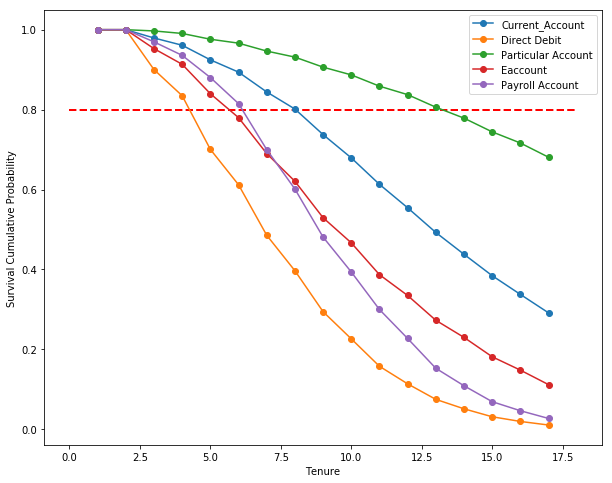

In [22]:
## create transpose of the survival matrix
Surv_ca_T = Surv_ca.T
Surv_dd_T = Surv_dd.T
Surv_pa_T = Surv_pa.T
Surv_ea_T = Surv_ea.T
Surv_pr_T = Surv_pr.T

plt.figure(figsize=(10,8))
plt.plot(Surv_ca_T.Cum_Surv_Prob,marker='o')
plt.plot(Surv_dd_T.Cum_Surv_Prob,marker='o')
plt.plot(Surv_pa_T.Cum_Surv_Prob,marker='o')
plt.plot(Surv_ea_T.Cum_Surv_Prob,marker='o')
plt.plot(Surv_pr_T.Cum_Surv_Prob,marker='o')
plt.hlines(y=0.8, xmin=0, xmax=18, linewidth=2, color='r',linestyle='dashed')
plt.xlabel('Tenure')
plt.ylabel('Survival Cumulative Probability')
plt.legend(['Current_Account','Direct Debit', 'Particular Account', 'Eaccount','Payroll Account'])
plt.show()